In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os
import pickle

In [ ]:
#load the datset
data = pd.read_csv('/content/personality_datasert.csv')

In [ ]:
# show the first 5 rows of dataset
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
#describe the data for better understanding
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
#checking is there any null values
data.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [ ]:
# convert numerical columns into int datatype
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
for col in numerical_cols:
      data[col] = data[col].astype(int)
display(data.head())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,No,4,6,No,13,5,Extrovert
1,9,Yes,0,0,Yes,0,3,Introvert
2,9,Yes,1,2,Yes,5,2,Introvert
3,0,No,6,7,No,14,8,Extrovert
4,3,No,9,4,No,8,5,Extrovert


In [ ]:
#check duplicates values
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 429


In [ ]:
#drop the duplicates values
data.drop_duplicates(inplace=True)
data.shape

(2471, 8)

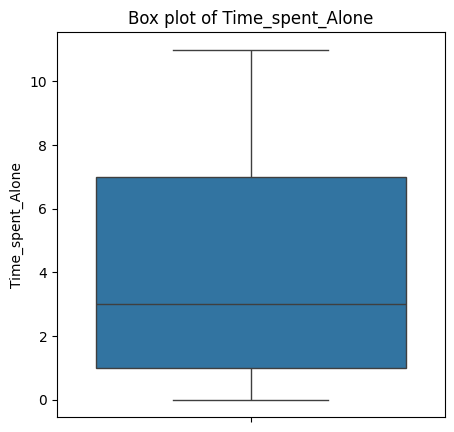

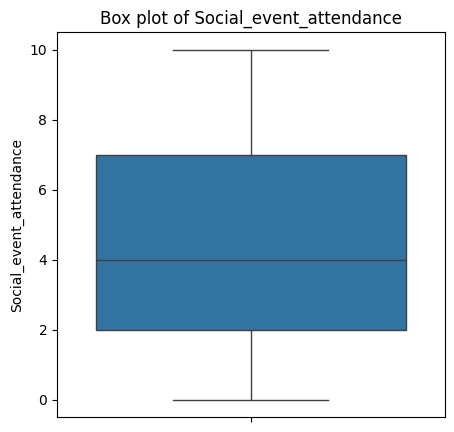

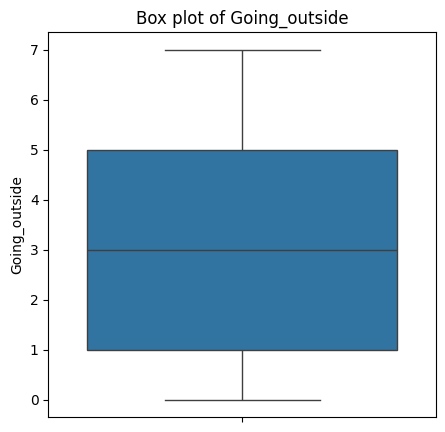

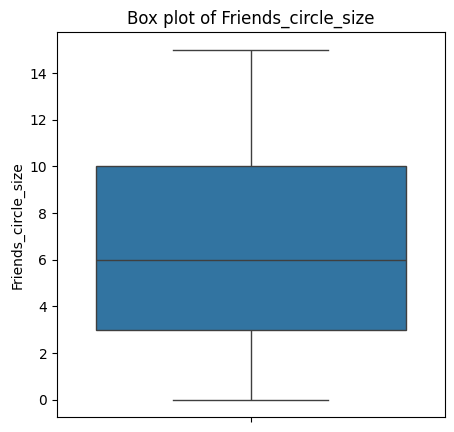

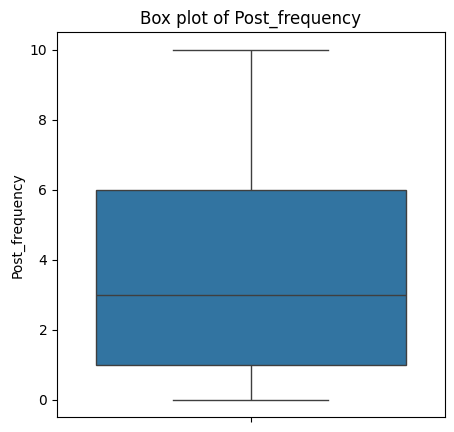

In [ ]:
#creating box plot t check outliers
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

for col in numerical_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

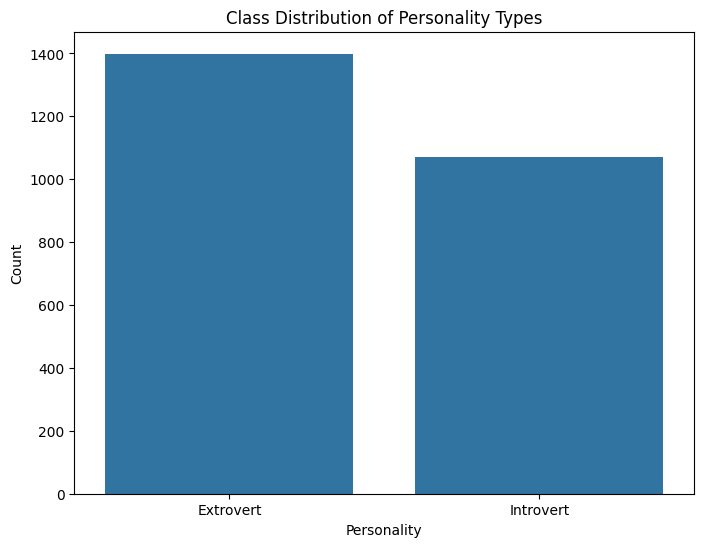

In [ ]:
# plotig barchart to distrubution of persenolality type
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Personality'])
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

In [ ]:
data.shape

(2471, 8)

In [ ]:
#Finding outliers
def find_outliers_IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Remove outliers for each numerical column
for col in numerical_cols:
    outliers = find_outliers_IQR(data[col])
    data = data[~data[col].isin(outliers)]
    print(f"Outliers in {col}:\n{outliers}\n")

Outliers in Time_spent_Alone:
Series([], Name: Time_spent_Alone, dtype: int64)

Outliers in Social_event_attendance:
Series([], Name: Social_event_attendance, dtype: int64)

Outliers in Going_outside:
Series([], Name: Going_outside, dtype: int64)

Outliers in Friends_circle_size:
Series([], Name: Friends_circle_size, dtype: int64)

Outliers in Post_frequency:
Series([], Name: Post_frequency, dtype: int64)



In [ ]:
# cahnge categorical data into numerical format
le=LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [ ]:
# giving values or columns to x and y
x=data[numerical_cols]
y=data['Personality']

In [ ]:
# split the data for traning and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# train logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# train decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
# train support vector
from sklearn.svm import SVC
svc=SVC() # default is rbf..
svc.fit(x_train, y_train)

SVC()

In [ ]:
# train random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# for classification report
from sklearn.metrics import classification_report

In [ ]:
# check the presession, recall, f1 score, accuracy
models = {
  "Random Forest": clf,
  "Logistic Regression": LogisticRegression(),
  "Decision Tree": DecisionTreeClassifier(max_depth=10),
  "SVC (RBF)": SVC(),
  "SVC (Linear)": SVC(kernel='linear')
}
results = {}
for model_name, model in models.items():
  print(f"Training and evaluating {model_name}...")
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  report = classification_report(y_test, predictions, output_dict=True)
  results[model_name] = report['accuracy']
  print(f"Evaluation for {model_name}:\n")
  print(classification_report(y_test, predictions))
  print("-" * 50)
print("\nModel Comparison (Accuracy):")
for model_name, accuracy in results.items():
  print(f"{model_name}: {accuracy:.4f}")

Training and evaluating Random Forest...
Evaluation for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       283
           1       0.85      0.91      0.88       212

    accuracy                           0.89       495
   macro avg       0.89      0.89      0.89       495
weighted avg       0.89      0.89      0.89       495

--------------------------------------------------
Training and evaluating Logistic Regression...
Evaluation for Logistic Regression:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       283
           1       0.88      0.95      0.92       212

    accuracy                           0.93       495
   macro avg       0.92      0.93      0.92       495
weighted avg       0.93      0.93      0.93       495

--------------------------------------------------
Training and evaluating Decision Tree...
Evaluation for Decision Tree:

              pr

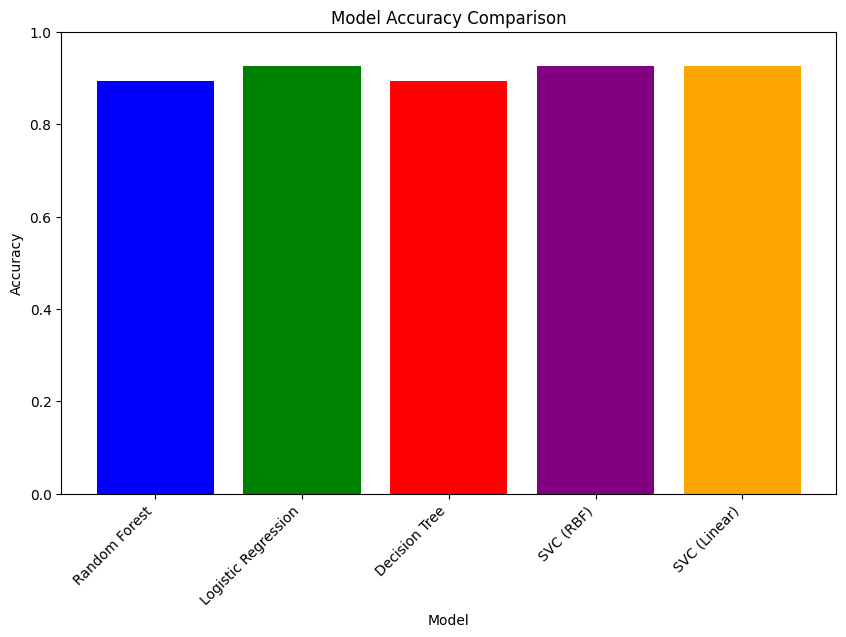

In [ ]:
#model accuracy using bar chart

import matplotlib.pyplot as plt
model_names = list(results.keys())
accuracy_scores = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn import metrics
y_pred = lr.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[256,  27],
       [ 10, 202]])

Generating confusion matrix for Random Forest...


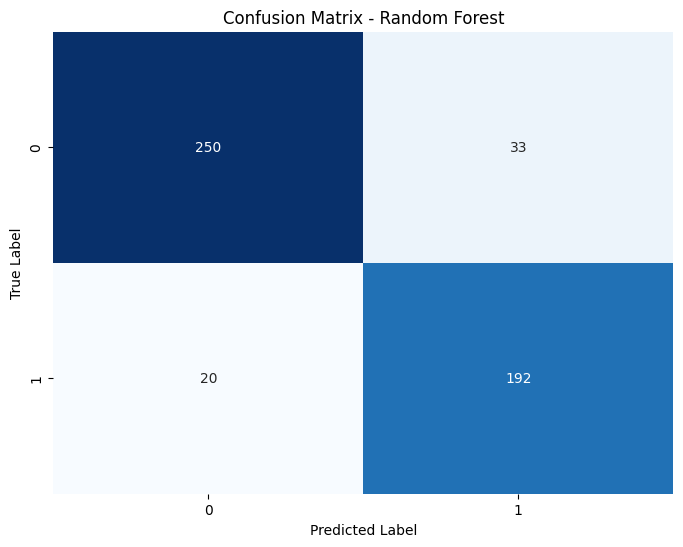

--------------------------------------------------
Generating confusion matrix for Logistic Regression...


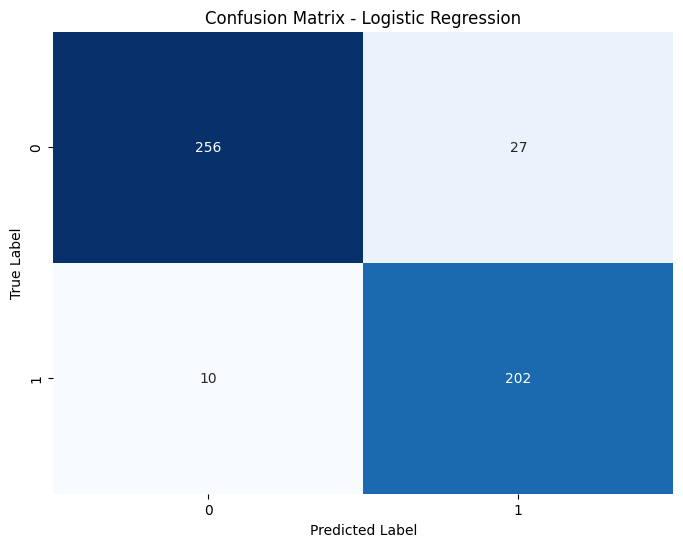

--------------------------------------------------
Generating confusion matrix for Decision Tree...


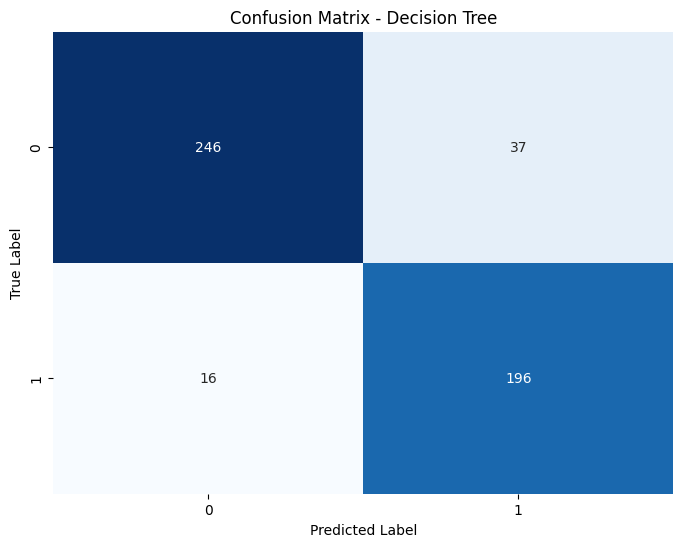

--------------------------------------------------
Generating confusion matrix for SVC (RBF)...


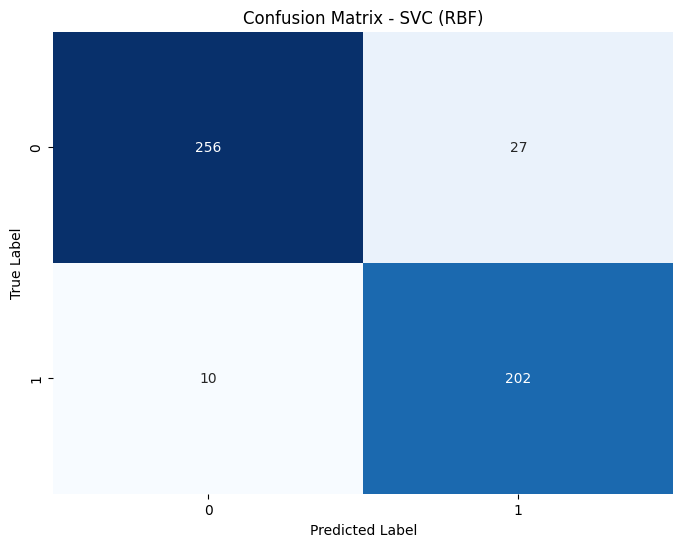

--------------------------------------------------
Generating confusion matrix for SVC (Linear)...


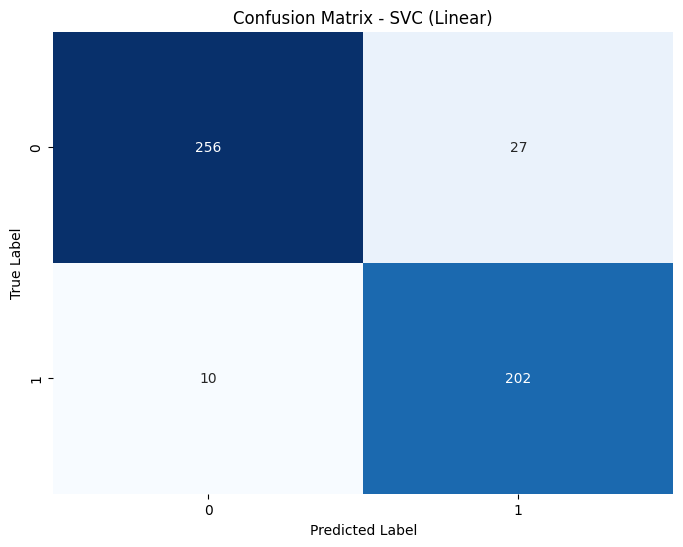

--------------------------------------------------


In [ ]:
# confusion matix for every model
for model_name, model in models.items():
  print(f"Generating confusion matrix for {model_name}...")
  y_pred = model.predict(x_test)
  cm = metrics.confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix - {model_name}")
  plt.show()
  print("-" * 50)

In [ ]:
x_test

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
1140,3,5,6,12,3
2508,0,4,5,11,5
1921,10,2,1,1,0
1731,2,8,4,15,4
364,0,4,5,6,3
...,...,...,...,...,...
2885,10,0,0,2,0
1120,4,3,0,5,2
2195,3,5,6,13,7
169,6,1,3,3,3


In [ ]:
y_test

,Personality
1140,0
2508,0
1921,1
1731,0
364,0
...,...
2885,1
1120,1
2195,0
169,1


In [ ]:
# here we can predict
predicted_numeric = lr.predict([[3,5,6,12,3]])
predicted_label = le.inverse_transform(predicted_numeric)
print(predicted_label)

['Extrovert']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:

# Create main folder + subfolders
os.makedirs("Personality_model_output/data", exist_ok=True)
os.makedirs("Personality_model_output/models", exist_ok=True)
os.makedirs("Personality_model_output/scripts", exist_ok=True)

In [ ]:
df = pd.read_csv("/content/personality_datasert.csv")

le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])
x=data[numerical_cols]
y=data['Personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Save data
os.makedirs("Personality_model_output/data", exist_ok=True)
pd.concat([x_train, y_train], axis=1).to_csv("Personality_model_output/data/train_data.csv", index=False)
pd.concat([x_test, y_test], axis=1).to_csv("Personality_model_output/data/test_data.csv", index=False)
pd

<module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>

In [ ]:
# Create directories if they don't exist
os.makedirs("Personality_model_output/models", exist_ok=True)
os.makedirs("Personality_model_output/scripts", exist_ok=True)

# Save the trained Logistic Regression model
with open('Personality_model_output/models/logistic_remodel.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [ ]:
%%writefile Personality_model_output/scripts/train_model.py
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/personality_datasert.csv')

# Handle duplicates
data.drop_duplicates(inplace=True)

# Label encode object type columns
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

# Define numerical columns and split data
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
x = data[numerical_cols]
y = data['Personality']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Save the trained model
with open('Personality_model_output/models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

print("Training complete and model saved.")

Writing Personality_model_output/scripts/train_model.py


In [ ]:
for root, dirs, files in os.walk("Personality_model_output"):
    level = root.replace("diabetes_model_output", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

Personality_model_output/
    models/
        logistic_remodel.pkl
    data/
        train_data.csv
        test_data.csv
    scripts/
        train_model.py


In [ ]:
import shutil

# creating zip file
shutil.make_archive("Personality_model_outputt", 'zip', "Personality_model_output")

'/content/Personality_model_outputt.zip'

In [ ]:
%%writefile Personality_model_output/scripts/test_model.py
import pandas as pd
import pickle
from sklearn.metrics import classification_report

# Load test data
test_data = pd.read_csv("Personality_model_output/data/test_data.csv")
X_test = test_data.drop("Personality", axis=1)
y_test = test_data["Personality"]

# Load trained model
with open("Personality_model_output/models/logistic_regression_model.pkl", "rb") as f:
    model = pickle.load(f)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Writing Personality_model_output/scripts/test_model.py
